<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Preprocessing
</div>

## 1. Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

## 2. Khám phá dữ liệu

### 2.1 Đọc dữ liệu từ file <font color="blue">"steam_game.csv" </font>


In [2]:
df = pd.read_csv('../data/steam_game_p2.csv')
df.head(10)

,Title,Genre,Tags,withDLC,isMature,Franchise,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent
0,Baldur's Gate 3,"Adventure, RPG, Strategy","RPG, Choices Matter, Story Rich, Character Cus...",1.0,1.0,Baldur's Gate,"3 Aug, 2023",Larian Studios,Larian Studios,"English, French, German, Spanish - Spain, Poli...","(498,632)","(515,427)","(16,795)","990.000,00₫",-10%
1,Counter-Strike 2,"Action, Free to Play","FPS, Shooter, Multiplayer, Competitive, Action...",1.0,1.0,NaN,"21 Aug, 2012",Valve,Valve,"English, Czech, Danish, Dutch, Finnish, French...","(6,845,621)","(7,809,836)","(964,215)",Free,NaN
2,Lethal Company,"Action, Adventure, Indie, Early Access","Online Co-Op, Horror, First-Person, Psychologi...",0.0,1.0,NaN,"23 Oct, 2023",Zeekerss,Zeekerss,English,"(218,847)","(222,992)","(4,145)","142.000,00₫",NaN
3,Cyberpunk 2077,RPG,"Cyberpunk, Open World, Nudity, RPG, Singleplay...",1.0,1.0,NaN,"9 Dec, 2020",CD PROJEKT RED,CD PROJEKT RED,"English, French, Italian, German, Spanish - Sp...","(564,519)","(697,970)","(133,451)","990.000,00₫",-50%
4,ELDEN RING,"Action, RPG","Souls-like, Dark Fantasy, Open World, RPG, Dif...",0.0,1.0,Bandai Namco Entertainment,"24 Feb, 2022",FromSoftware Inc.,FromSoftware Inc.,"English, French, Italian, German, Spanish - Sp...","(688,189)","(744,999)","(56,810)","898.000,00₫",-40%
5,Apex Legends™,"Action, Adventure, Free to Play","Free to Play, Battle Royale, Multiplayer, Shoo...",0.0,0.0,Apex Legends,"4 Nov, 2020",Respawn Entertainment,Electronic Arts,"English, French, Italian, German, Spanish - Sp...","(613,541)","(773,739)","(160,198)",Free,NaN
6,Dota 2,"Action, Strategy, Free to Play","Free to Play, MOBA, Multiplayer, Strategy, eSp...",1.0,0.0,Dota,"9 Jul, 2013",Valve,Valve,"English, Bulgarian, Czech, Danish, Dutch, Finn...","(1,758,564)","(2,142,374)","(383,810)",Free,NaN
7,Hogwarts Legacy,"Action, Adventure, RPG","Magic, Fantasy, Open World, Singleplayer, Adve...",1.0,0.0,WB Games,"10 Feb, 2023",Avalanche Software,Warner Bros. Games,"English, French, Italian, German, Spanish - Sp...","(225,796)","(245,819)","(20,023)","1.290.000,00₫",-50%
8,Dead by Daylight,Action,"Horror, Survival Horror, Multiplayer, Online C...",1.0,1.0,Dead by Daylight,"14 Jun, 2016",Behaviour Interactive Inc.,Behaviour Interactive Inc.,"English, French, Italian, German, Spanish - Sp...","(565,863)","(704,111)","(138,248)","230.000,00₫",-65%
9,Project Zomboid,"Indie, RPG, Simulation, Early Access","Survival, Zombies, Open World, Open World Surv...",0.0,0.0,NaN,"8 Nov, 2013",The Indie Stone,The Indie Stone,"English, French, Italian, German, Spanish - Sp...","(246,145)","(261,675)","(15,530)","260.000,00₫",-33%


### 2.2 Ta xem xét có tổng cộng bao nhiêu hàng và cột thuộc tính ở tập dữ liệu thô 
Nếu dữ liệu có trên 1000 dòng và phải có trên 5 cột thuộc tính thì dữ liệu mới đủ để tiến hành các bước khai thác, xây dựng mô hình học máy, học sâu, ... 

Ngược lại, dữ liệu quá ít, không đủ -> cần thu thập thêm dữ liệu

In [3]:
num_rows, num_cols = df.shape
print(f'Current shape of data: {df.shape}')
if (num_rows > 100) & (num_cols > 5):
    print('Data is good !')
else:
    print('You should collect more data')

Current shape of data: (9583, 15)
Data is good !


### 2.3 Ta xem xét ý nghĩa của từng cột dữ liệu
1. Title: Tên trò chơi điện tử trên website steam
2. Genre: Thể loại trò chơi
3. Tags: các nhãn trò chơi mà người dùng(người chơi) gắn cho trò chơi
4. withDLC: trò chơi có kèm theo các downloadable content hay không ?	
5. isMature: trò chơi có được gán nhãn không phù hợp cho trẻ nhỏ hay không?
6. Franchise: tên thương hiệu của trò chơi	
7. ReleaseDate: Ngày phát hành của trò chơi	
8. Developer: Nhà phát triển trò chơi	
9. Publisher: Nhà phát hành trò chơi
10. Languages: Các ngôn ngữ được hỗ trợ trong trò chơi	
11. PositiveReviews: Số đánh giá tích cực về trò chơi	
12. TotalReviews: Tổng số đánh giá của người chơi về trò chơi
13. NegativeReviews: Số đánh giá tiêu cực về trò chơi
14. OriginalPrice: Giá bán gốc của trò chơi
15. DiscountPercent: Giảm giá áp dụng trên giá gốc(%)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9583 entries, 0 to 9582
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9531 non-null   object 
 1   Genre            9515 non-null   object 
 2   Tags             9531 non-null   object 
 3   withDLC          9583 non-null   float64
 4   isMature         9583 non-null   float64
 5   Franchise        4576 non-null   object 
 6   ReleaseDate      9526 non-null   object 
 7   Developer        9525 non-null   object 
 8   Publisher        9509 non-null   object 
 9   Languages        9531 non-null   object 
 10  PositiveReviews  9518 non-null   object 
 11  TotalReviews     9518 non-null   object 
 12  NegativeReviews  9518 non-null   object 
 13  OriginalPrice    9583 non-null   object 
 14  DiscountPercent  8220 non-null   object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


### 2.4 Xử lí missing value
Kiểm tra xem mỗi feature chiếm nhiêu % missing value:

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title               0.542628
Genre               0.709590
Tags                0.542628
withDLC             0.000000
isMature            0.000000
Franchise          52.248774
ReleaseDate         0.594803
Developer           0.605238
Publisher           0.772201
Languages           0.542628
PositiveReviews     0.678284
TotalReviews        0.678284
NegativeReviews     0.678284
OriginalPrice       0.000000
DiscountPercent    14.223103
dtype: float64

Ta sẽ tính lại giá trị ở cột *OriginalPrice* sau khi đã áp dụng giảm giá để có cái nhìn chính xác về giá tiền thật sự người mua hàng phải bỏ ra, sau đó đổi tên thành *DiscountedPrice*.

Trước hết, ta sẽ chuyển tất cả giá trị với đơn vị tiền tệ "$" sang "VND", tiến hàng loại bỏ kí tự hiển thị đơn vị tiền tệ, đưa giá trị "Free" thành 0 ở cột *OriginalPrice*

In [6]:
# Hàm chuyển đổi giá trị cột Price
def convert_price(price):
    if price == "Free":
        return 0.0
    elif '₫' in price:
        formatted_price = float(price[: -4].replace('₫', '').replace('.', '').replace(',', ''))
        return round(formatted_price, 2)
    elif '$' in price:
        usd_to_vnd = 24265
        formatted_price =  float(price.replace('$', '')) * usd_to_vnd
        return round(formatted_price, 2)

df['OriginalPrice'] = df['OriginalPrice'].apply(convert_price) 

In [7]:
# Hàm chuyển đổi giá trị cột Discount
def convert_discount(discount):
    if pd.isna(discount):
        return 0
    else:
        return float(discount.replace('-', '').replace('%', '')) * 0.01

df['DiscountPercent'] = df['DiscountPercent'].apply(convert_discount)

In [8]:
# Hàm tính tổng Price sau khi áp dụng Discount
def price_after_discount(x):
    discount_percent = x['DiscountPercent']
    if pd.isna(discount_percent):
        return x['OriginalPrice']
    else:
        return x['OriginalPrice'] * (1 - discount_percent)

df['DiscountedPrice'] = df.apply(price_after_discount, axis = 1)

Bây giờ kiểm tra cột mới `DiscountedPrice`

In [9]:
df['DiscountedPrice']

0       891000.0
1            0.0
2       142000.0
3       495000.0
4       538800.0
          ...   
9578         0.0
9579     33750.0
9580         0.0
9581     87500.0
9582     73500.0
Name: DiscountedPrice, Length: 9583, dtype: float64

#### Vì cột Franchise chứa quá nhiều dữ liệu bị thiếu (hơn 50%), nhưng lại không thể "fill" giá trị ngẫu nhiêu nào, hay có giá trị đặc thù nào có thể thay thế những dữ liệu bị thiếu mà không gây nhiễu

Nên ta chọn loại bỏ hẳn cột này ra khỏi dataframe

In [10]:
df.drop(columns = ['Franchise'], inplace = True)

Loại bỏ các game có `Title` là NaN

In [11]:
df.dropna(subset=['Title'], inplace=True)

Kiểm tra dữ liệu ở cột *Release Date*, nếu giá trị là Nan, đồng nghĩa với trò chơi điện tử này chưa được phát hành chính thức nên xóa khỏi dataframe.

In [12]:
df.dropna(subset = 'ReleaseDate', inplace = True)

In [13]:
# Check missing value
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              0.000000
Genre              0.167961
Tags               0.000000
withDLC            0.000000
isMature           0.000000
ReleaseDate        0.000000
Developer          0.062986
Publisher          0.230947
Languages          0.000000
PositiveReviews    0.136469
TotalReviews       0.136469
NegativeReviews    0.136469
OriginalPrice      0.000000
DiscountPercent    0.000000
DiscountedPrice    0.000000
dtype: float64

#### Dữ liệu vẫn đang còn missing value!

### 2.5 Kiểm tra kiểu dữ liệu phù hợp với cột
Đầu tiên ta xem xét type của các cột

In [14]:
df.dtypes

Title               object
Genre               object
Tags                object
withDLC            float64
isMature           float64
ReleaseDate         object
Developer           object
Publisher           object
Languages           object
PositiveReviews     object
TotalReviews        object
NegativeReviews     object
OriginalPrice      float64
DiscountPercent    float64
DiscountedPrice    float64
dtype: object

Một số cột có kiểu dữ liệu chưa phù hợp như `ReleaseDate`, `PositiveReviews`, `TotalReviews` và `NegativeReviews`. Ta sẽ điều chỉnh các cột dữ liệu này.

Điều chỉnh định dạng của các cột `PositiveReviews`, `TotalReviews` và `NegativeReviews` thành kiểu `float`.

In [15]:
def format_reviews_col(review):
    regex = r'[(),]'
    # review = review.replace('.0', '')
    replacement = re.sub(regex, '', str(review))
    return replacement

cols_review = ['PositiveReviews', 'TotalReviews', 'NegativeReviews']
df[cols_review] = df[cols_review].applymap(format_reviews_col)
df[cols_review] = df[cols_review].astype(np.float64)

In [16]:
df[cols_review]

,PositiveReviews,TotalReviews,NegativeReviews
0,498632.0,515427.0,16795.0
1,6845621.0,7809836.0,964215.0
2,218847.0,222992.0,4145.0
3,564519.0,697970.0,133451.0
4,688189.0,744999.0,56810.0
...,...,...,...
9578,84.0,101.0,17.0
9579,372.0,453.0,81.0
9580,142.0,191.0,49.0
9581,57.0,61.0,4.0


Chuyển cột *ReleaseDate* về kiểu `datetime`

In [17]:
def convert_to_datetime(date_str):
    formats = [r'%b %d, %Y', r'%d %b, %Y', r'%b %Y']
    for format in formats:
        try:
            return dt.strptime(date_str, format)
        except ValueError:
            pass
    return np.nan

df['ReleaseDate'] = df['ReleaseDate'].apply(convert_to_datetime)

In [18]:
# Check
type(df['ReleaseDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9526 entries, 0 to 9582
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            9526 non-null   object        
 1   Genre            9510 non-null   object        
 2   Tags             9526 non-null   object        
 3   withDLC          9526 non-null   float64       
 4   isMature         9526 non-null   float64       
 5   ReleaseDate      9525 non-null   datetime64[ns]
 6   Developer        9520 non-null   object        
 7   Publisher        9504 non-null   object        
 8   Languages        9526 non-null   object        
 9   PositiveReviews  9513 non-null   float64       
 10  TotalReviews     9513 non-null   float64       
 11  NegativeReviews  9513 non-null   float64       
 12  OriginalPrice    9526 non-null   float64       
 13  DiscountPercent  9526 non-null   float64       
 14  DiscountedPrice  9526 non-null   float64

Missing value ở các vẫn còn tồn tại ở khá nhiều thuộc tính, tuy nhiên số lượng không đáng kể nên ta có thể fill các dòng này:

In [20]:
df['Genre'].fillna(df['Genre'].mode().values[0], inplace=True)
df['Developer'].fillna(df['Developer'].mode().values[0], inplace=True)
df['Publisher'].fillna(df['Publisher'].mode().values[0], inplace=True)
df['ReleaseDate'].fillna(df['ReleaseDate'].mode().values[0], inplace=True)
df['PositiveReviews'].fillna(df['PositiveReviews'].mode().values[0], inplace=True)
df['TotalReviews'].fillna(df['TotalReviews'].mode().values[0], inplace=True)
df['NegativeReviews'].fillna(df['NegativeReviews'].mode().values[0], inplace=True)
df['OriginalPrice'].fillna(df['OriginalPrice'].mode().values[0], inplace=True)
df['DiscountPercent'].fillna(df['DiscountPercent'].mode().values[0], inplace=True)
df['DiscountedPrice'].fillna(df['DiscountedPrice'].mode().values[0], inplace=True)

Kiểm tra thêm một lần nữa:


In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              0.0
Genre              0.0
Tags               0.0
withDLC            0.0
isMature           0.0
ReleaseDate        0.0
Developer          0.0
Publisher          0.0
Languages          0.0
PositiveReviews    0.0
TotalReviews       0.0
NegativeReviews    0.0
OriginalPrice      0.0
DiscountPercent    0.0
DiscountedPrice    0.0
dtype: float64

### 2.6 Kiểm tra tính toàn vẹn dữ liệu

Ta sẽ tính tổng cột positive và negative reviews có bằng giá trị ở cột Total review hay không?

In [22]:
check_review_cols = (df['NegativeReviews'] + df['PositiveReviews'] == df['TotalReviews']).sum()
check_sum = check_review_cols.sum()
if check_sum == df.shape[0]:
    print('Data in Review columns are good !!!')
else:
    print('Have to update the value in Positive or Negative review using Total and another')

Have to update the value in Positive or Negative review using Total and another


In [23]:
mask = df['NegativeReviews'] + df['PositiveReviews'] != df['TotalReviews']
df.loc[mask, 'NegativeReviews'] = df.loc[mask, 'TotalReviews'] - df.loc[mask, 'PositiveReviews']

### 2.7 Kiểm tra sự trùng lặp dữ liệu 

Trước khi tính Rating cho từng trò chơi điện tử, ta kiểm tra các cột có bị trùng nhau không.

Sự trùng lặp sẽ dựa trên cột **Title**, nếu có sự trùng lặp thì tiến hành loại bỏ và giữ lại sự xuất hiện đầu tiên

In [24]:
num_duplicated_rows = df.duplicated('Title').sum()
if num_duplicated_rows == 0:
    print('Data is good with no duplicated rows')
else:
    print('Drop duplicated rows, but keep first occurence')

df.drop_duplicates(keep = 'first', inplace = True)

Drop duplicated rows, but keep first occurence


## 3. Phân tích cột dữ liệu số (numerical feature)

In [25]:
numeric_df = df.select_dtypes(include='number')
numeric_df.describe()

,withDLC,isMature,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice
count,9269.000000,9269.000000,9.269000e+03,9.269000e+03,9269.000000,9.269000e+03,9269.000000,9.269000e+03
mean,0.449563,0.218254,8.497340e+03,9.664013e+03,1166.672564,2.366783e+05,0.444999,1.210667e+05
std,0.497476,0.413083,8.242057e+04,9.349747e+04,11853.421971,2.129635e+05,0.270401,1.361701e+05
min,0.000000,0.000000,6.000000e+00,9.000000e+00,-22.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,2.140000e+02,2.550000e+02,27.000000,1.200000e+05,0.250000,4.625000e+04
50%,0.000000,0.000000,7.590000e+02,9.010000e+02,111.000000,1.880000e+05,0.500000,8.460000e+04
75%,1.000000,0.000000,3.060000e+03,3.605000e+03,470.000000,2.600000e+05,0.700000,1.505000e+05
max,1.000000,1.000000,6.845621e+06,7.809836e+06,964215.000000,2.400000e+06,0.980000,2.400000e+06


### Quan sát bảng mô tả số liệu ta thấy:
- Ta thấy trong dữ liệu sau khi loại bỏ các missing value thì còn 1728 dòng.
- Số điểm trung bình của tất cả các game là xấp xỉ 0.9, số điểm thấp nhất là 0.76, và cao nhất là 0.97.

### 3.1 Kiểm tra xem dữ liệu có giá những giá trị ngoại lai `outliers` không:

<Figure size 4000x9000 with 0 Axes>

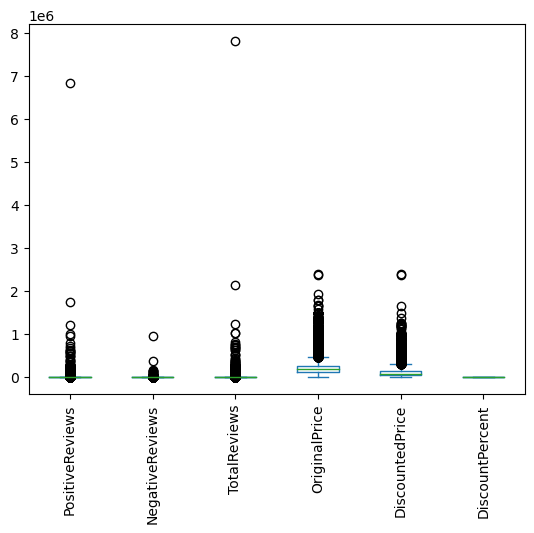

In [26]:
numeric_cols = ['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'OriginalPrice', 'DiscountedPrice', 'DiscountPercent']
plt.figure(figsize=(40,90))
df[numeric_cols].plot(kind='box')
plt.xticks(rotation=90)
plt.show()

Ta thấy những giá trị này có một số `outliers`. Giờ ta sẽ tiến hành xóa các dòng chứa giá trị này

In [27]:
# Hàm loại bỏ giá trị ngoại lai
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

Xóa các outliers:

In [28]:
numeric_cols = ['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'OriginalPrice', 'DiscountedPrice', 'DiscountPercent']
for col in numeric_cols:
    df[col] = BoxplotOutlierClipper().fit_transform(df[col])
# df.reset_index(inplace=True, drop=True)

<Figure size 7000x9000 with 0 Axes>

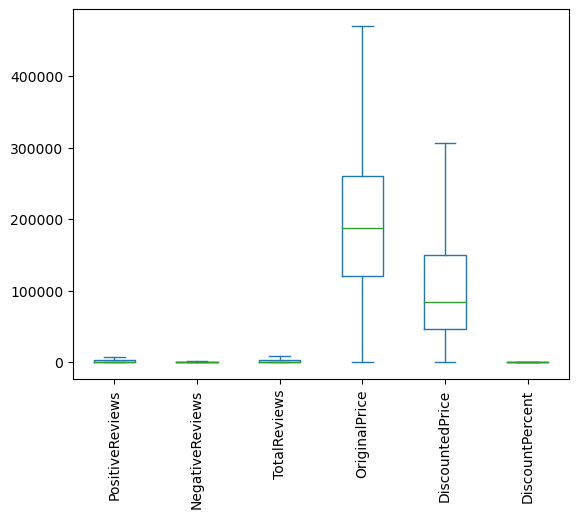

In [29]:
plt.figure(figsize=(70,90))
df[numeric_cols].plot(kind='box')
plt.xticks(rotation=90)
plt.show()

### 3.2 Kiểm tra xem có bao nhiêu thể loại (Genre) từ những game ta đọc được?
- Việc này sẽ giúp ta lựa chọn kiểu encoding cho các dữ liệu categorical một cách hợp lí.

Trước hết ta sẽ kiểm tra xem những giá trị unique trong `Genre`:

In [30]:
def get_unique_values(feature):
    temp = df[feature]
    feature_as_str = ', '.join(temp).split(', ')
    feature_as_str = set(feature_as_str)
    return len(feature_as_str)

Lấy số lượng các unique `Genre`: 

In [31]:
unique_genres = get_unique_values('Genre')
print(f'Số lượng unique genre: {unique_genres}')

Số lượng unique genre: 15


Ta thử kiểm tra xem những genre được phân bố như thế nào:

In [32]:
def get_distributed_cat(feature):
    temp = df[feature]
    feature_as_str = ', '.join(temp).split(', ')
    distributed_dict = {}
    
    for index, item in temp.items():
        
        for element in item.split(', '):
            if element in distributed_dict:
                # If this tag already existed in the dictionary, increase the count
                distributed_dict[element] += 1
            else:
                # Else add the tag in the dictionary with count 1
                distributed_dict[element] = 1
        
    return distributed_dict

{'Indie': 5235, 'Adventure': 4025, 'Action': 4012, 'Simulation': 2437, 'RPG': 2415, 'Casual': 2406, 'Strategy': 2281, 'Early Access': 896, 'Free to Play': 449, 'Sports': 407, 'Massively Multiplayer': 337, 'Racing': 333, 'Utilities': 2, 'Audio Production': 1, 'Education': 1}


<Axes: title={'center': 'Phân bố genre'}>

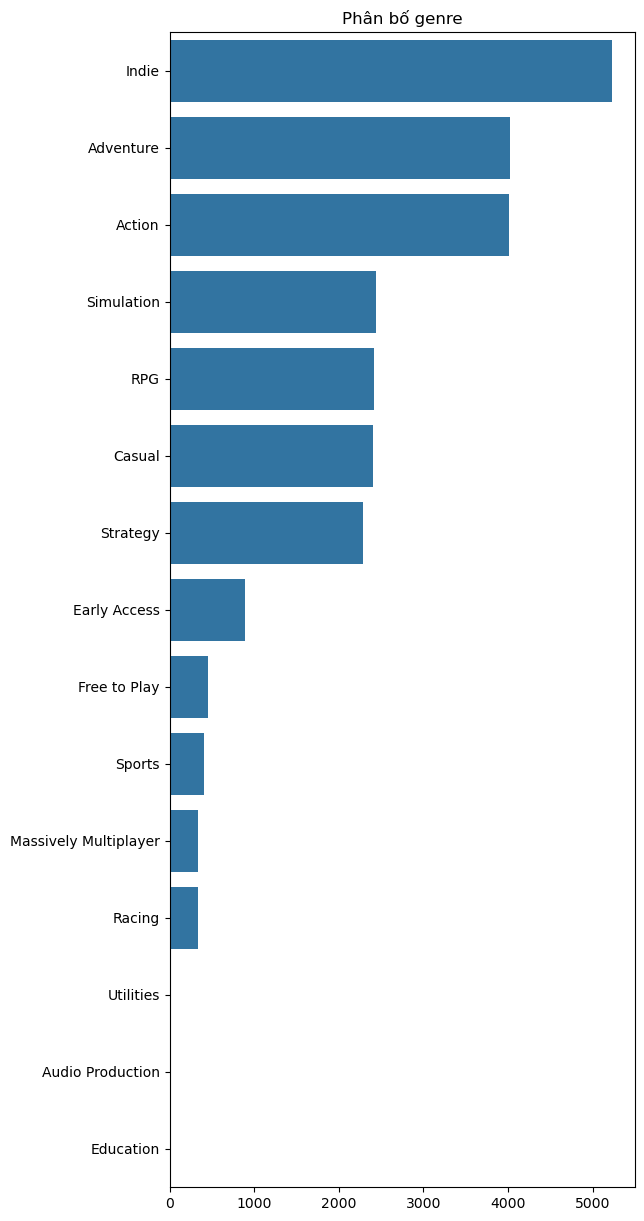

In [33]:
distributed_genre = get_distributed_cat('Genre')
distributed_genre = dict(sorted(distributed_genre.items(), key=lambda item: item[1],reverse=True))
print(distributed_genre)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Phân bố genre")
sns.barplot(x=list(distributed_genre.values()), y=list(distributed_genre.keys()), ax=ax)

Nhìn trên biểu đồ, ta thấy số lượng game có genre là `Indie` chiếm rất nhiều, trong khi đó một số genre chỉ được chỉ có trong 1 game mà chúng ta đã thu thập.

Tiếp theo ta thử kiểm tra số lượng các `Tags` như thế nào:

In [34]:
unique_tags = get_unique_values('Tags')
print(f'Số lượng unique tag: {unique_tags}')

Số lượng unique tag: 441


Số lượng tag là 358, quá nhiều để thể hiện lên trên biểu đồ. Do đó ta sẽ chỉ lấy những tag có phân bố lớn nhất (khoảng 20) để vẽ biểu đồ:

<Axes: title={'center': 'Phân bố tag'}>

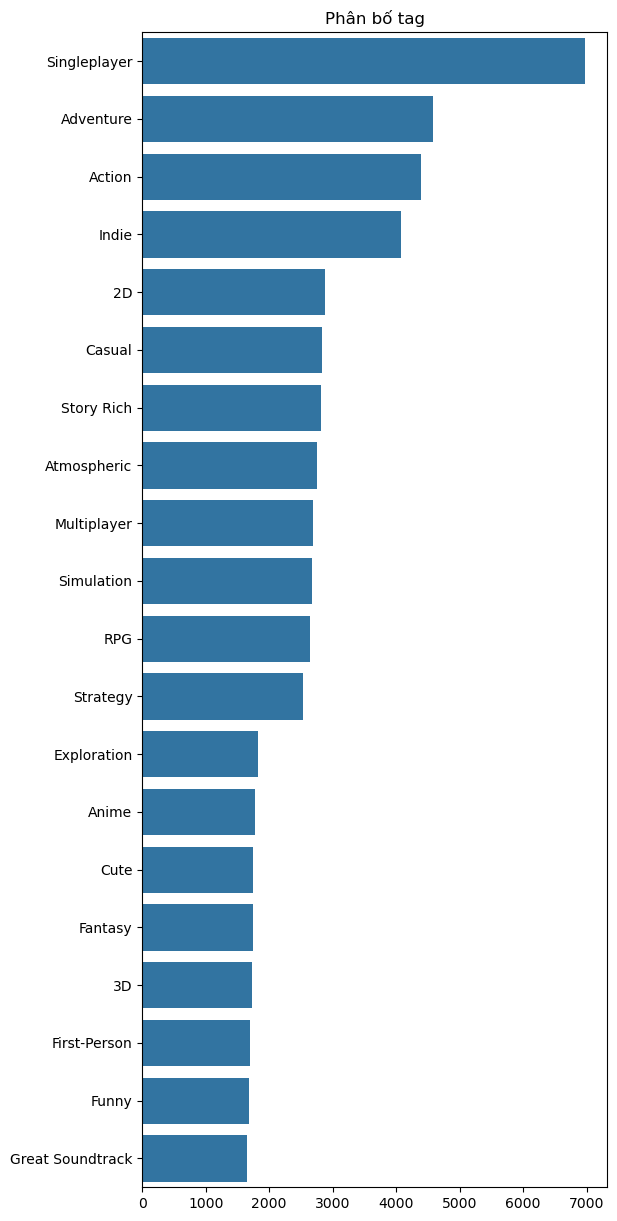

In [35]:
distributed_tag = get_distributed_cat('Tags')
distributed_tag = dict(sorted(distributed_tag.items(), key=lambda item: item[1], reverse=True))
# print(distributed_tag)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Phân bố tag")
sns.barplot(x=list(distributed_tag.values())[:20], y=list(distributed_tag.keys())[:20], ax=ax)

Theo như quan sát và tìm hiểu, thì `Genre` được phân loại theo đặc trưng chính và tổng quát của game, còn `Tags` là phân loại theo các yếu tố, nội dung trong game một cách chi tiết hơn.\
Hơn nữa do số lượng tag quá lớn có thể dẫn đến khó encode và ảnh hưởng đến hiệu năng của mô hình, ta nên drop nó và chỉ cần giữ lại `Genre`.

In [36]:
df.drop('Tags', axis=1, inplace=True)
df

,Title,Genre,withDLC,isMature,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice
0,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,2023-08-03,Larian Studios,Larian Studios,"English, French, German, Spanish - Spain, Poli...",7329.0,8630.0,1134.5,470000.0,0.1,306875.0
1,Counter-Strike 2,"Action, Free to Play",1.0,1.0,2012-08-21,Valve,Valve,"English, Czech, Danish, Dutch, Finnish, French...",7329.0,8630.0,1134.5,0.0,0.0,0.0
2,Lethal Company,"Action, Adventure, Indie, Early Access",0.0,1.0,2023-10-23,Zeekerss,Zeekerss,English,7329.0,8630.0,1134.5,142000.0,0.0,142000.0
3,Cyberpunk 2077,RPG,1.0,1.0,2020-12-09,CD PROJEKT RED,CD PROJEKT RED,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,470000.0,0.5,306875.0
4,ELDEN RING,"Action, RPG",0.0,1.0,2022-02-24,FromSoftware Inc.,FromSoftware Inc.,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,470000.0,0.4,306875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9575,Furry Boss 💼,"Adventure, Casual, Indie, Simulation",1.0,1.0,2023-12-02,Dirty Fox Games,Dirty Fox Games,English,18.0,18.0,0.0,73500.0,0.0,73500.0
9576,Khimera: Puzzle Island,"Adventure, Casual, Indie",1.0,0.0,2020-11-29,Suits & Sandals,Suits & Sandals,"English, Japanese",184.0,190.0,6.0,73500.0,0.9,7350.0
9579,HeXen II,Action,0.0,0.0,1998-03-27,Raven Software,id Software,English,372.0,453.0,81.0,112500.0,0.7,33750.0
9581,Time Commando,Action,0.0,0.0,1996-07-31,[2.21],[2.21],English,57.0,61.0,4.0,87500.0,0.0,87500.0


### 3.3 Số hóa các feature

Ở đây, ta sẽ bắt đầu số hóa các dữ liệu category, datetime và boolean để chuẩn bị cho huấn luyện mô hình

Đầu tiên là số hóa cột datetime và boolean:

In [37]:
df[['withDLC', 'isMature']] = df[['withDLC', 'isMature']].replace({True: 1, False: 0})
df['ReleaseYear'] = df['ReleaseDate'].dt.year
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
df['ReleaseDay'] = df['ReleaseDate'].dt.day

Sau khi số hóa cột datetime, ta tiến hành drop cột `ReleaseDate`:

In [38]:
df.drop('ReleaseDate', axis=1, inplace=True)
df

,Title,Genre,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay
0,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,"English, French, German, Spanish - Spain, Poli...",7329.0,8630.0,1134.5,470000.0,0.1,306875.0,2023,8,3
1,Counter-Strike 2,"Action, Free to Play",1.0,1.0,Valve,Valve,"English, Czech, Danish, Dutch, Finnish, French...",7329.0,8630.0,1134.5,0.0,0.0,0.0,2012,8,21
2,Lethal Company,"Action, Adventure, Indie, Early Access",0.0,1.0,Zeekerss,Zeekerss,English,7329.0,8630.0,1134.5,142000.0,0.0,142000.0,2023,10,23
3,Cyberpunk 2077,RPG,1.0,1.0,CD PROJEKT RED,CD PROJEKT RED,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,470000.0,0.5,306875.0,2020,12,9
4,ELDEN RING,"Action, RPG",0.0,1.0,FromSoftware Inc.,FromSoftware Inc.,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,470000.0,0.4,306875.0,2022,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9575,Furry Boss 💼,"Adventure, Casual, Indie, Simulation",1.0,1.0,Dirty Fox Games,Dirty Fox Games,English,18.0,18.0,0.0,73500.0,0.0,73500.0,2023,12,2
9576,Khimera: Puzzle Island,"Adventure, Casual, Indie",1.0,0.0,Suits & Sandals,Suits & Sandals,"English, Japanese",184.0,190.0,6.0,73500.0,0.9,7350.0,2020,11,29
9579,HeXen II,Action,0.0,0.0,Raven Software,id Software,English,372.0,453.0,81.0,112500.0,0.7,33750.0,1998,3,27
9581,Time Commando,Action,0.0,0.0,[2.21],[2.21],English,57.0,61.0,4.0,87500.0,0.0,87500.0,1996,7,31


## 4. Tạo cột tính điểm cho game

##### Ta sẽ sử dụng công thức sau để tính score_rating cho từng trò chơi điện tử dựa trên giá trị ở các cột Reviews với miền giá trị sau khi tính sẽ là [0, 1]
- Total Reviews = Positive Reviews + Negative Reviews
- Review Score = Positive Reviews / Total Reviews
- $$Rating = Review Score - (Review Score - 0.5)*2^{-log_{10}(Total Reviews + 1)}$$


Một số lý do để sử dụng công thức này:
1. Tập trung vào các phản hồi tích cực, có nghĩa là mỗi phản hồi tích cực có tác động lớn hơn trên score_rating so với phản hồi tiêu cực
2. Mặc dù công thức tập trung và nhấn mạnh phản hồi tích cực nhưng không bỏ qua bất kì phản hồi tiêu cực nào
3. Có sự cân bằng khi ta cân nhắc phản hổi tích cực thật sự quan trọng hơn nhưng phản hồi tiêu cực cũng có ảnh hưởng nhất định

In [39]:
ReviewScore = df['PositiveReviews'] / df['TotalReviews']
df['Rating'] = ReviewScore - (ReviewScore - 0.5) * pow(2, -np.log10(df['TotalReviews'] + 1))
df

,Title,Genre,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating
0,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,"English, French, German, Spanish - Spain, Poli...",7329.0,8630.0,1134.5,470000.0,0.1,306875.0,2023,8,3,0.826430
1,Counter-Strike 2,"Action, Free to Play",1.0,1.0,Valve,Valve,"English, Czech, Danish, Dutch, Finnish, French...",7329.0,8630.0,1134.5,0.0,0.0,0.0,2012,8,21,0.826430
2,Lethal Company,"Action, Adventure, Indie, Early Access",0.0,1.0,Zeekerss,Zeekerss,English,7329.0,8630.0,1134.5,142000.0,0.0,142000.0,2023,10,23,0.826430
3,Cyberpunk 2077,RPG,1.0,1.0,CD PROJEKT RED,CD PROJEKT RED,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,470000.0,0.5,306875.0,2020,12,9,0.826430
4,ELDEN RING,"Action, RPG",0.0,1.0,FromSoftware Inc.,FromSoftware Inc.,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,470000.0,0.4,306875.0,2022,2,24,0.826430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9575,Furry Boss 💼,"Adventure, Casual, Indie, Simulation",1.0,1.0,Dirty Fox Games,Dirty Fox Games,English,18.0,18.0,0.0,73500.0,0.0,73500.0,2023,12,2,0.793924
9576,Khimera: Puzzle Island,"Adventure, Casual, Indie",1.0,0.0,Suits & Sandals,Suits & Sandals,"English, Japanese",184.0,190.0,6.0,73500.0,0.9,7350.0,2020,11,29,0.872043
9579,HeXen II,Action,0.0,0.0,Raven Software,id Software,English,372.0,453.0,81.0,112500.0,0.7,33750.0,1998,3,27,0.770269
9581,Time Commando,Action,0.0,0.0,[2.21],[2.21],English,57.0,61.0,4.0,87500.0,0.0,87500.0,1996,7,31,0.809010


**Tiền xử lí hoàn tất, ta xuất dữ liệu ra một file mới chuẩn bị cho giai đoạn học máy:**

In [40]:
df.to_csv('../data/processed_data.csv', index=False)